#Proyecto_entrega2

**Therry Jones Bnet O'neill, CC 1107433181, Ingeniería Electrica**

**Julián Mateo Mena Urrego, CC 1038821102, Ingeniería Electrica**

**Miguel Angel Rivera Florez, CC 1152467107, Ingeniería Materiales**

#Dataset

https://www.kaggle.com/code/armaanseth6702/predict-co2-emissions-in-rwanda

# Instalacion de modulos y librerias necesarias

In [11]:
! pip install kaggle


# Librerias Necesarias


Importo las librerias para la modelacion de los datos.

In [9]:
# Importar librerias
import pandas as pd
import numpy as np
import random
import os
import json
import requests
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Lectura de la base de datos

Cargamos las credenciales de Kaggle del compañero y estudiante Julian mena  para facilitar el acceso a los datasets, los cuales son train, test y sample_submission.

In [10]:
data = {"username":"julianmena42","key":"b7cb043ab70f4bb16bbca4728b2d2e2f"}
with open('kaggle.json', 'w') as file:
    json.dump(data, file, indent=4)

In [12]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

#Cargar datos de la dataset

In [13]:

!kaggle competitions download -c playground-series-s3e20

 92% 45.0M/48.9M [00:01<00:00, 38.8MB/s]
100% 48.9M/48.9M [00:01<00:00, 29.2MB/s]


#Descompresión de archivos

In [14]:

!unzip playground-series-s3e20.zip

Archive:  playground-series-s3e20.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [15]:
# Set seed for reproducability
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

# 1. Lectura de la base de datos
La base de datos está alojada en el servidor de google drive educativo del estudiante Therry bent, el acceso lo hemos configurado para que la lectura sea pública, y los datasets serán asignados en las variables train, test y sample_submission.

#Asignacion de variables

In [16]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
samplesubmission = pd.read_csv('sample_submission.csv')

In [17]:
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51000,29.29000,2019,0,-0.00011,0.60302,-0.00007,0.25567,-98.59389,...,3664.43622,61085.80957,2615.12048,15.56853,0.27229,-12.62899,35.63242,-138.78642,30.75214,3.75099
1,ID_-0.510_29.290_2019_01,-0.51000,29.29000,2019,1,0.00002,0.72821,0.00001,0.13099,16.59286,...,3651.19031,66969.47873,3174.57242,8.69060,0.25683,30.35938,39.55763,-145.18393,27.25178,4.02518
2,ID_-0.510_29.290_2019_02,-0.51000,29.29000,2019,2,0.00051,0.74820,0.00038,0.11002,72.79584,...,4216.98649,60068.89445,3516.28267,21.10341,0.25110,15.37788,30.40182,-142.51954,26.19330,4.23138
3,ID_-0.510_29.290_2019_03,-0.51000,29.29000,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.50774,51064.54734,4180.97332,15.38690,0.26204,-11.29340,24.38036,-132.66583,28.82915,4.30529
4,ID_-0.510_29.290_2019_04,-0.51000,29.29000,2019,4,-0.00008,0.67630,-0.00005,0.12116,4.12127,...,3980.59812,63751.12578,3355.71011,8.11469,0.23585,38.53226,37.39298,-141.50981,22.20461,4.34732


In [18]:
samplesubmission.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,81.94000
1,ID_-0.510_29.290_2022_01,81.94000
2,ID_-0.510_29.290_2022_02,81.94000
3,ID_-0.510_29.290_2022_03,81.94000
4,ID_-0.510_29.290_2022_04,81.94000


In [19]:
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51000,29.29000,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.02734,8472.31348,41047.93750,7472.31348,7.93562,0.24077,-100.11379,33.69704,-133.04755,33.77958
1,ID_-0.510_29.290_2022_01,-0.51000,29.29000,2022,1,0.00046,0.69116,0.00032,0.00000,76.23920,...,48539.73724,6476.14732,54915.70858,5476.14716,11.44844,0.29312,-30.51032,42.40259,-138.63282,31.01238
2,ID_-0.510_29.290_2022_02,-0.51000,29.29000,2022,2,0.00016,0.60511,0.00011,0.07987,-42.05534,...,34133.08047,8984.79570,39006.09375,7984.79570,10.75318,0.26713,39.08736,45.93648,-144.78499,26.74336
3,ID_-0.510_29.290_2022_03,-0.51000,29.29000,2022,3,0.00035,0.69692,0.00024,0.20103,72.16957,...,50854.99108,6014.72406,57646.36837,5014.72412,11.76456,0.30468,-24.46513,42.14042,-135.02789,29.60477
4,ID_-0.510_29.290_2022_04,-0.51000,29.29000,2022,4,-0.00032,0.58053,-0.00018,0.20435,76.19086,...,46594.68514,6849.28048,52896.54187,5849.28039,13.06532,0.28422,-12.90785,30.12264,-135.50012,26.27681


In [20]:
train.shape, test.shape, samplesubmission.shape

((79023, 76), (24353, 75), (24353, 2))

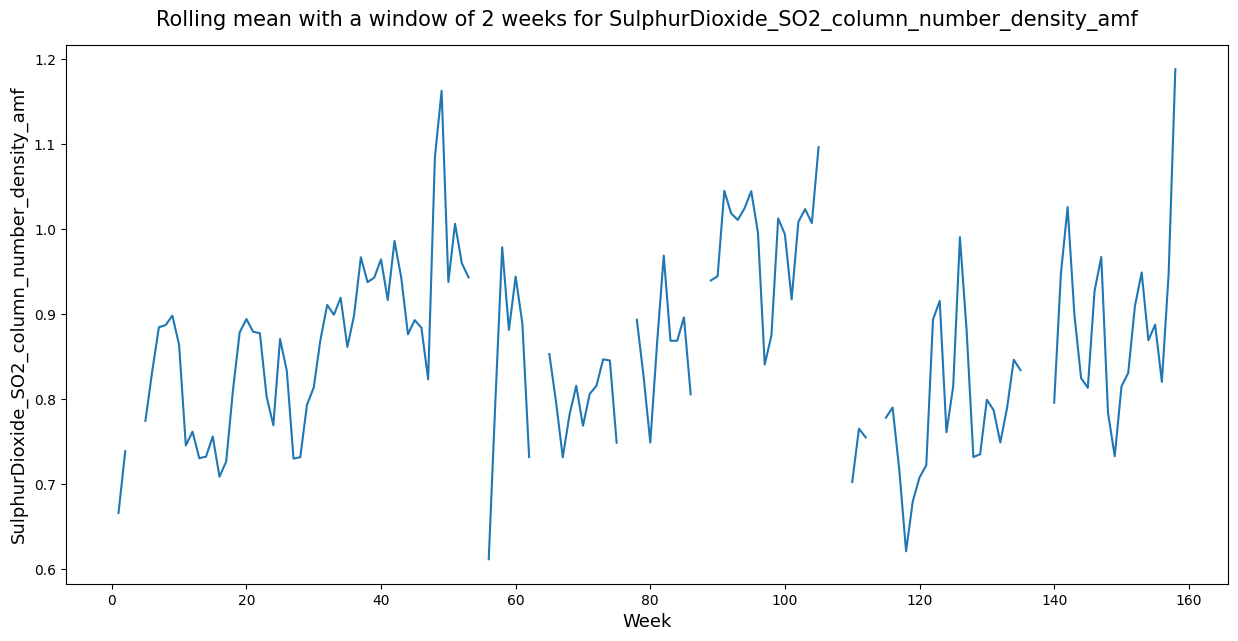

In [21]:
# 1. Crear una ubicación única desde latitud y longitud
train['location'] = train['latitude'].round(2).astype(str) + '_' + train['longitude'].round(2).astype(str)

# 2. Filtrar el conjunto de datos para la ubicación deseada
example_loc = train[train['location'] == '-0.51_29.29']

# 3. Calcular la media móvil con una ventana de 2 semanas
rolling_mean = example_loc['SulphurDioxide_SO2_column_number_density_amf'].rolling(window=2).mean()

# 4. Visualizar los resultados
plt.figure(figsize=(15, 7))
rolling_mean.plot()
plt.title('Rolling mean with a window of 2 weeks for SulphurDioxide_SO2_column_number_density_amf', y=1.02, fontsize=15)
plt.xlabel('Week', y=1.05, fontsize=13)
plt.ylabel('SulphurDioxide_SO2_column_number_density_amf', x=1.05, fontsize=13)
plt.show()


In [22]:
#Excepto por las columnas de índice (latitud, longitud, año y número de semana) y el objetivo (emisión), a todas las columnas les faltan valores.x
# Aplicar codificación one-hot a la columna 'location' y manejar los valores faltantes
# Para el conjunto de entrenamiento (train)
with pd.option_context("display.min_rows", 14):
    # Mostrar la suma de valores faltantes ordenados
    display(train.isna().sum().sort_values())

# Dejar un espacio en blanco entre las visualizaciones
print()

# Para el conjunto de prueba (test)
with pd.option_context("display.min_rows", 14):
    # Mostrar la suma de valores faltantes ordenados
    display(test.isna().sum().sort_values())

ID_LAT_LON_YEAR_WEEK                                            0
emission                                                        0
week_no                                                         0
location                                                        0
longitude                                                       0
latitude                                                        0
year                                                            0
Cloud_sensor_zenith_angle                                     484
Cloud_solar_zenith_angle                                      484
Cloud_solar_azimuth_angle                                     484
Cloud_cloud_top_height                                        484
Cloud_cloud_base_pressure                                     484
Cloud_cloud_fraction                                          484
Cloud_cloud_optical_depth                                     484
Cloud_sensor_azimuth_angle                                    484
Cloud_clou

ID_LAT_LON_YEAR_WEEK                                            0
latitude                                                        0
longitude                                                       0
year                                                            0
week_no                                                         0
UvAerosolIndex_sensor_altitude                                147
UvAerosolIndex_sensor_azimuth_angle                           147
UvAerosolIndex_sensor_zenith_angle                            147
UvAerosolIndex_solar_azimuth_angle                            147
UvAerosolIndex_solar_zenith_angle                             147
Ozone_O3_column_number_density                                147
Ozone_O3_column_number_density_amf                            147
Ozone_O3_slant_column_number_density                          147
Ozone_O3_effective_temperature                                147
Ozone_cloud_fraction                                          147
Ozone_sens

In [23]:
#El resultado de esta operación será una serie de pandas con las combinaciones únicas de latitud
# y longitud como índice y el valor promedio de las emisiones como datos
train.groupby(['latitude', 'longitude']).emission.mean().sort_values()

latitude  longitude
-1.68200  29.21800       0.00000
-2.85900  29.04100       0.00000
-1.83300  28.46700       0.00000
-2.84100  29.15900       0.00000
-1.97400  28.52600       0.00000
-1.73000  28.47000       0.00000
-1.71200  28.68800       0.00000
-1.69600  28.30400       0.00000
-2.81700  29.28300       0.00000
-1.83900  28.76100       0.00000
-2.49600  28.50400       0.00000
-2.89800  29.00200       0.00000
-1.53200  28.56800       0.00000
-1.50500  30.99500       0.00000
-1.32800  28.87200       0.00000
-0.76600  29.53400       0.00500
-2.65200  29.14800       0.00527
-2.98600  29.11400       0.06238
-1.22300  29.37700       0.06929
-1.33500  29.46500       0.07827
-0.59800  29.10200       0.09036
-1.44400  30.85600       0.10747
-3.04700  28.75300       0.12513
-3.16100  28.83900       0.12581
-1.28300  30.41700       0.15640
-2.04900  29.15100       0.18375
-0.80100  29.49900       0.18376
-0.72600  29.37400       0.22506
-1.93800  31.36200       0.23099
-1.98100  31.21900     